###**IRIS DATASET**




Iris dataset is a typically machine learning classification problem.These are three species of iris flower when a new flower is given.We need to predict it below in which type.

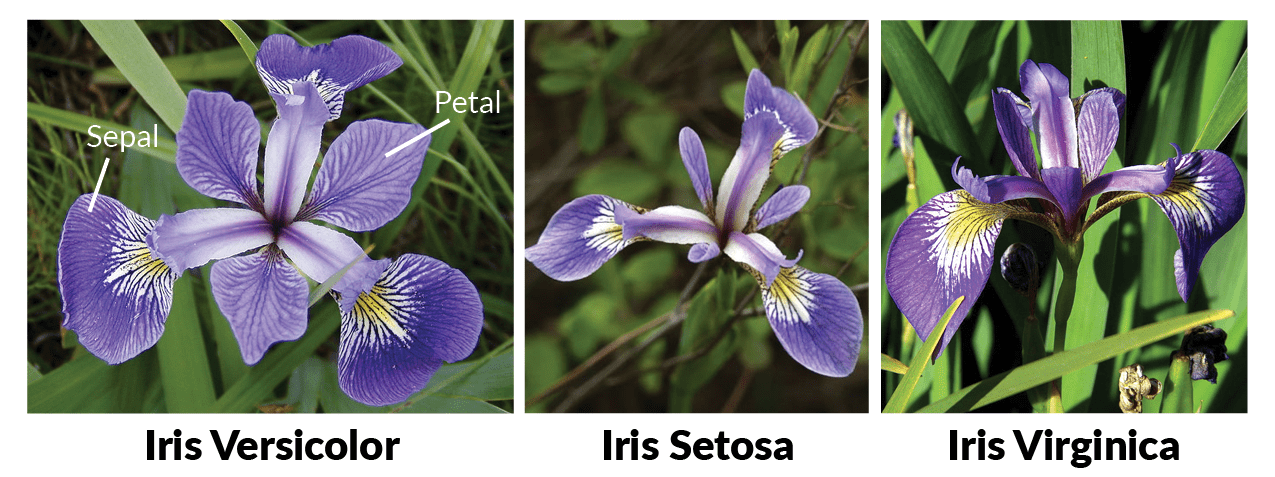

#Now we have to extract some features from this by some numerical and mesurement method


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

#BASIC DATA EXPLORATION AND EDA


In [3]:
Iris_data=pd.read_csv("Iris.csv")

In [4]:
Iris_data.head()  #head describe the top 5 row of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_data.tail() #tail describe the top 5 row of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


from the information it tell us the data types are 1 integer,4 float and 1 object type.

In [7]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

In [8]:
# now we have to find the value counts of each species.
Iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
Iris_data.isnull().any() # from this as you know there is no missing value so our data is properly correct.

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

#DATA VISUALIZATION


To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.

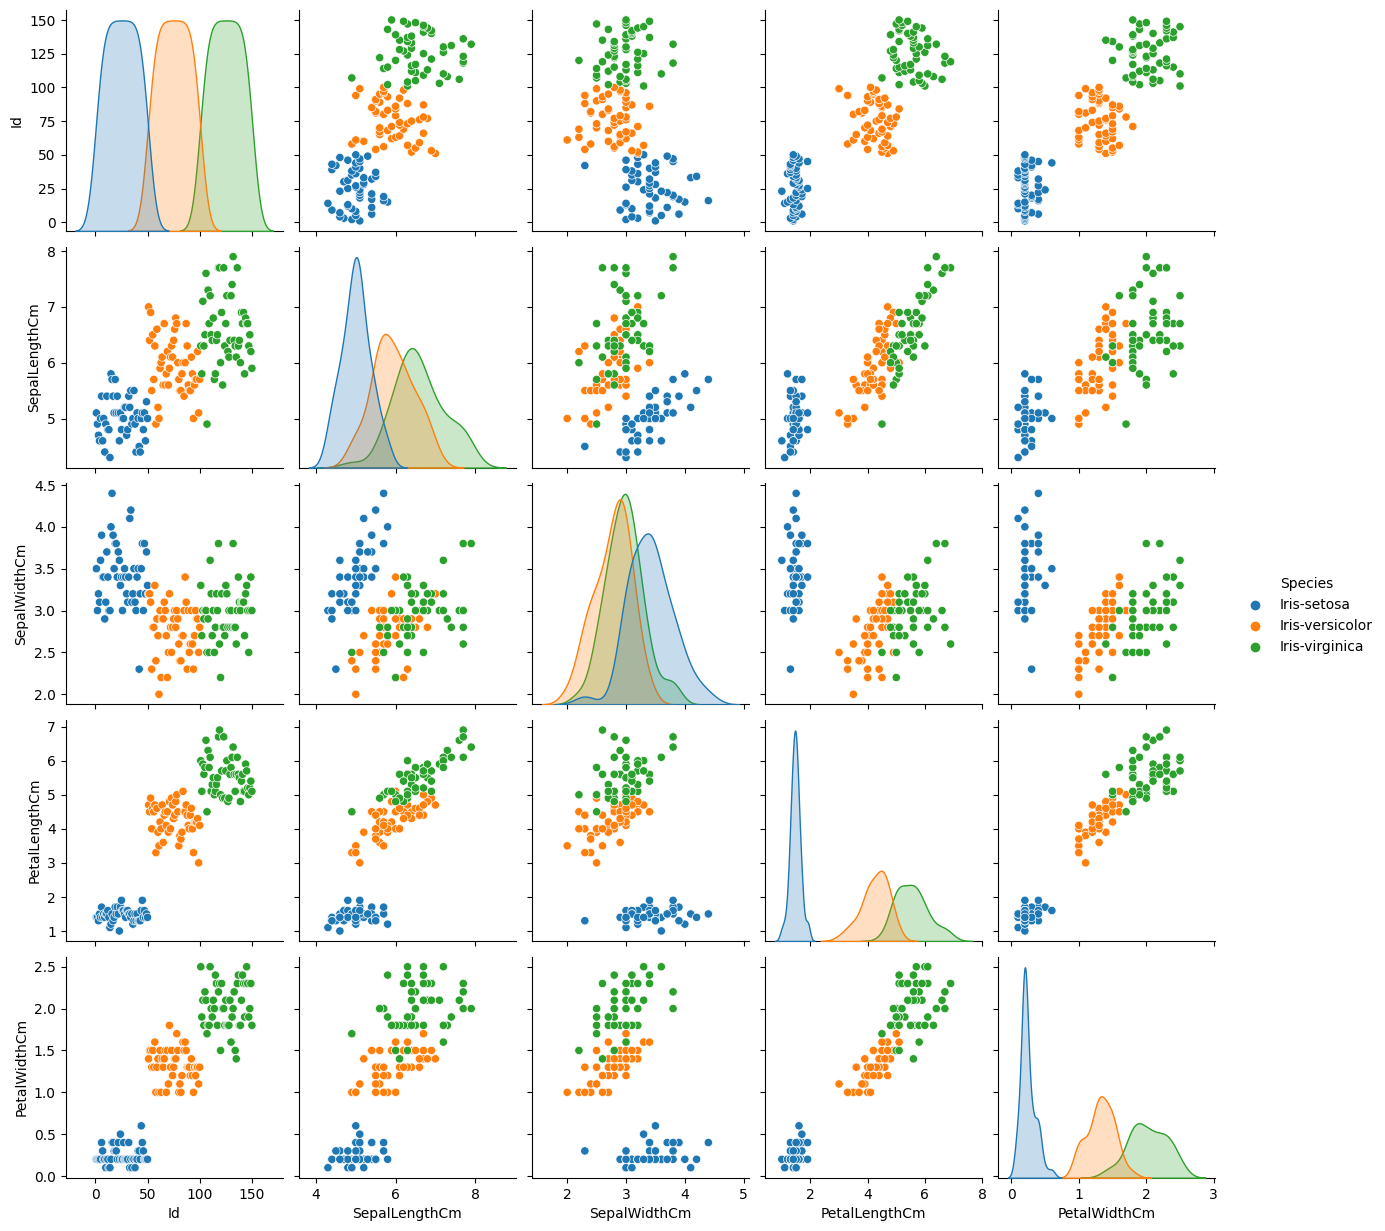

In [10]:
sns.pairplot(Iris_data,hue='Species')




*   According to this visualization, we can tell that setosa is well separated from the other two respective flowers.
* And iris virginica is the longest in sepal_width flower and iris setosa is the shortest







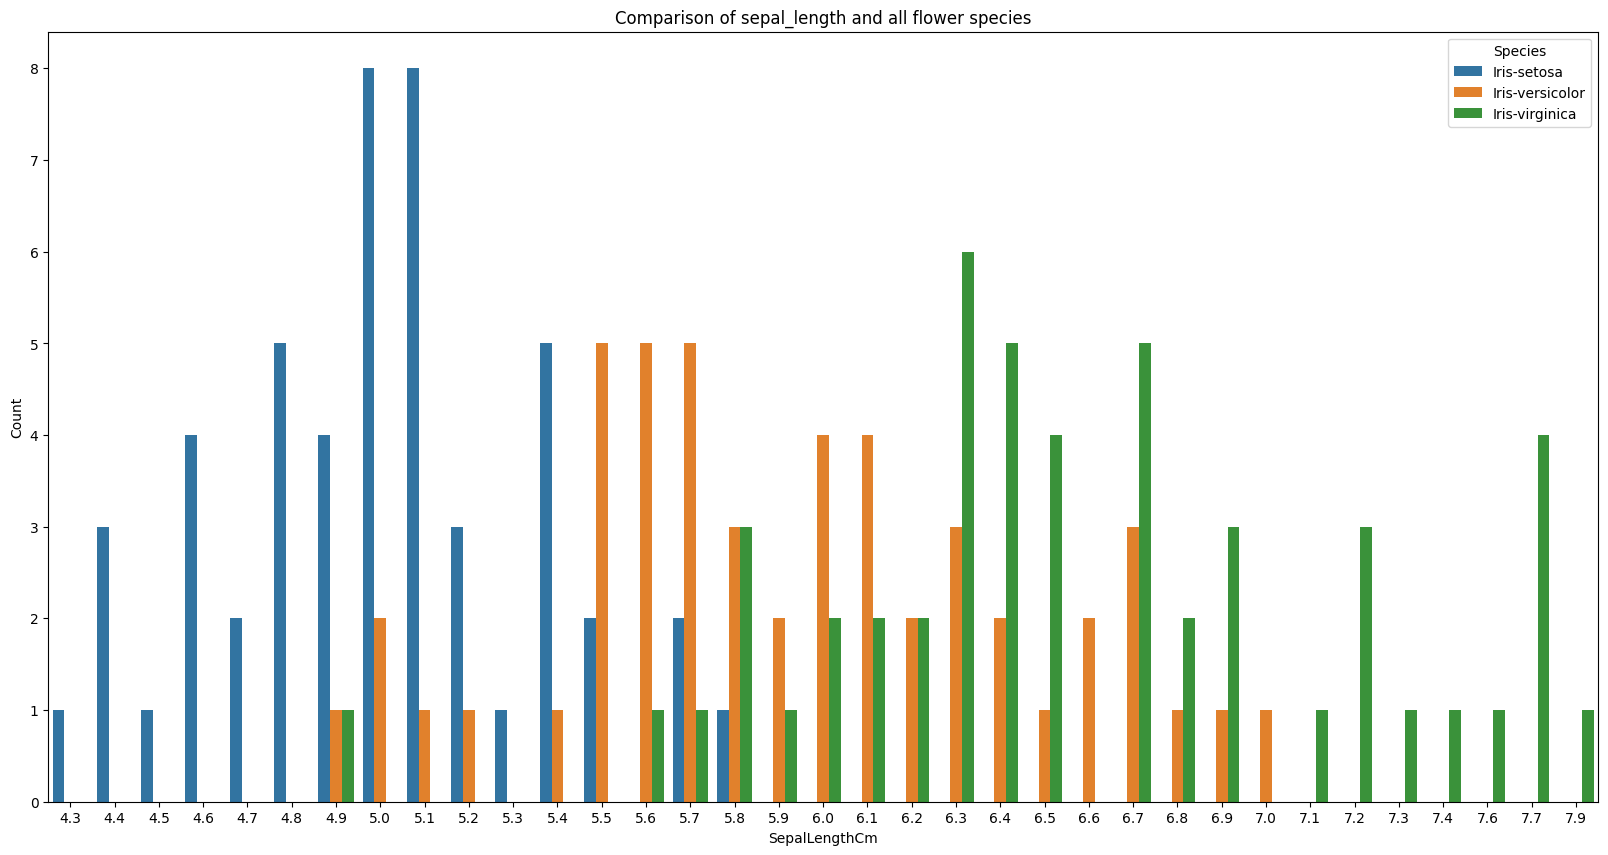

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(x='SepalLengthCm', hue='Species', data=Iris_data)

# Add titles and labels
plt.title('Comparison of sepal_length and all flower species')
plt.xlabel('SepalLengthCm')
plt.ylabel('Count')
plt.legend(title='Species', loc='upper right')

# Show the plot
plt.show()

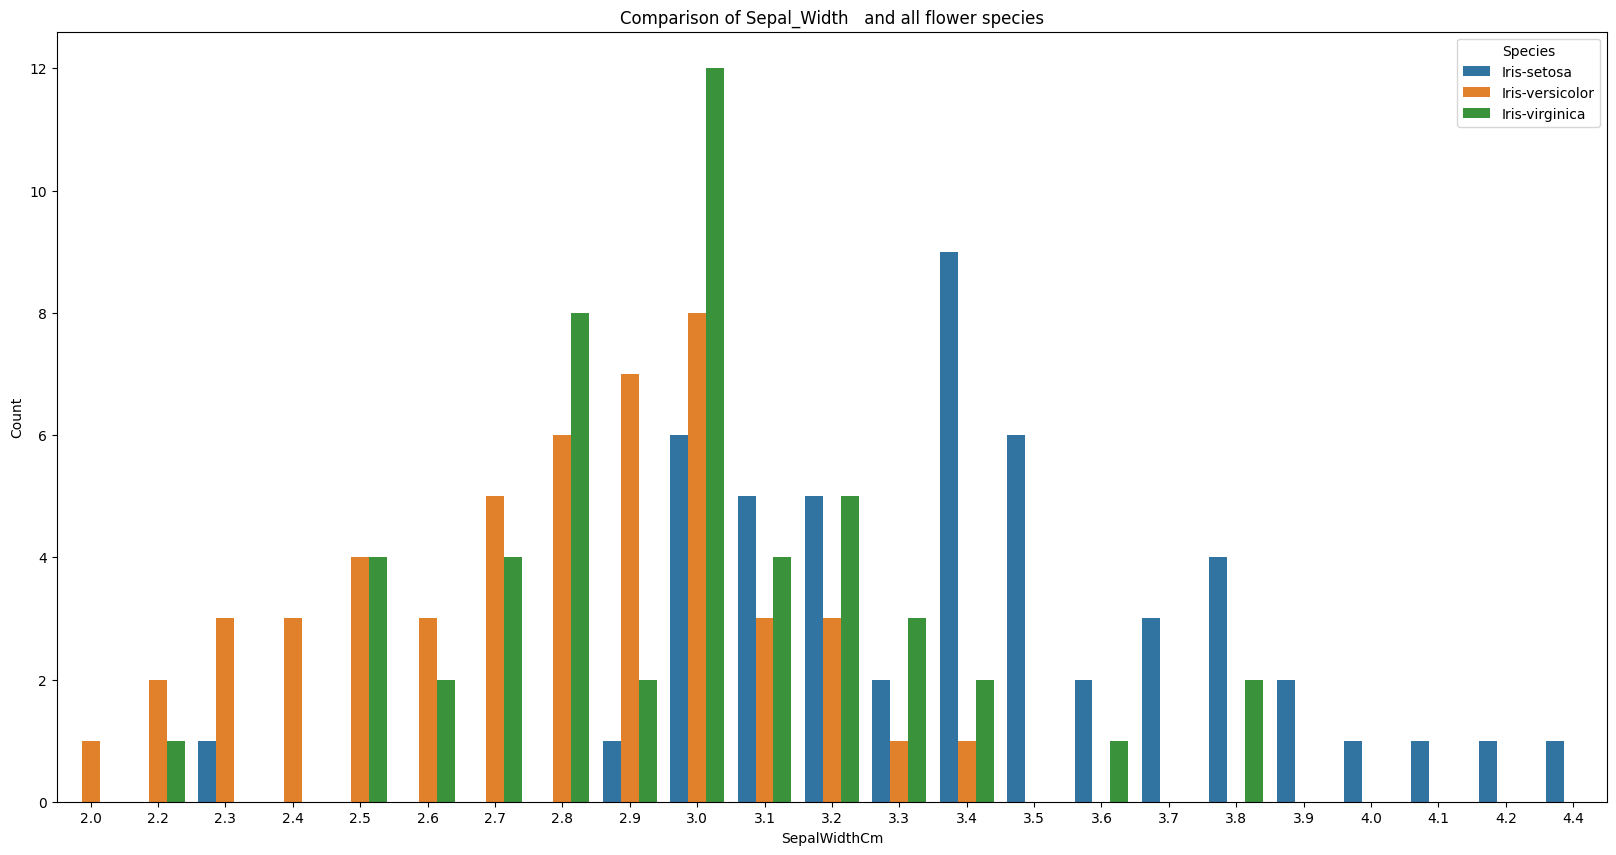

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x='SepalWidthCm', hue='Species', data=Iris_data)

# Add titles and labels
plt.title('Comparison of Sepal_Width   and all flower species')
plt.xlabel('SepalWidthCm')
plt.ylabel('Count')
plt.legend(title='Species', loc='upper right')
# Show the plot
plt.show()

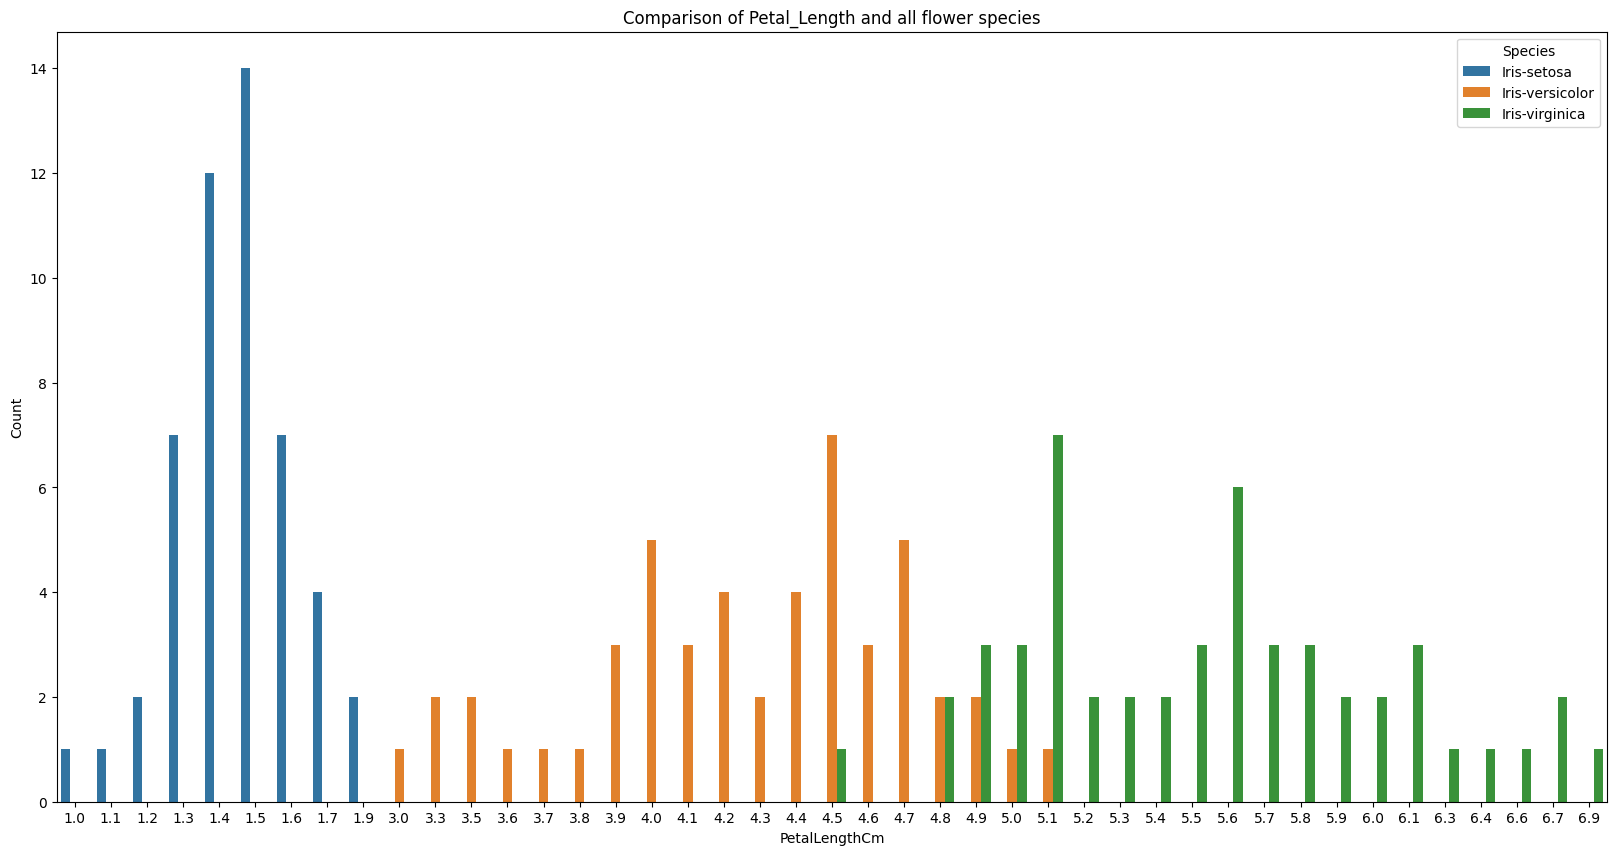

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x='PetalLengthCm', hue='Species', data=Iris_data)

# Add titles and labels
plt.title('Comparison of Petal_Length and all flower species')
plt.xlabel('PetalLengthCm')
plt.ylabel('Count')
plt.legend(title='Species', loc='upper right')
# Show the plot
plt.show()

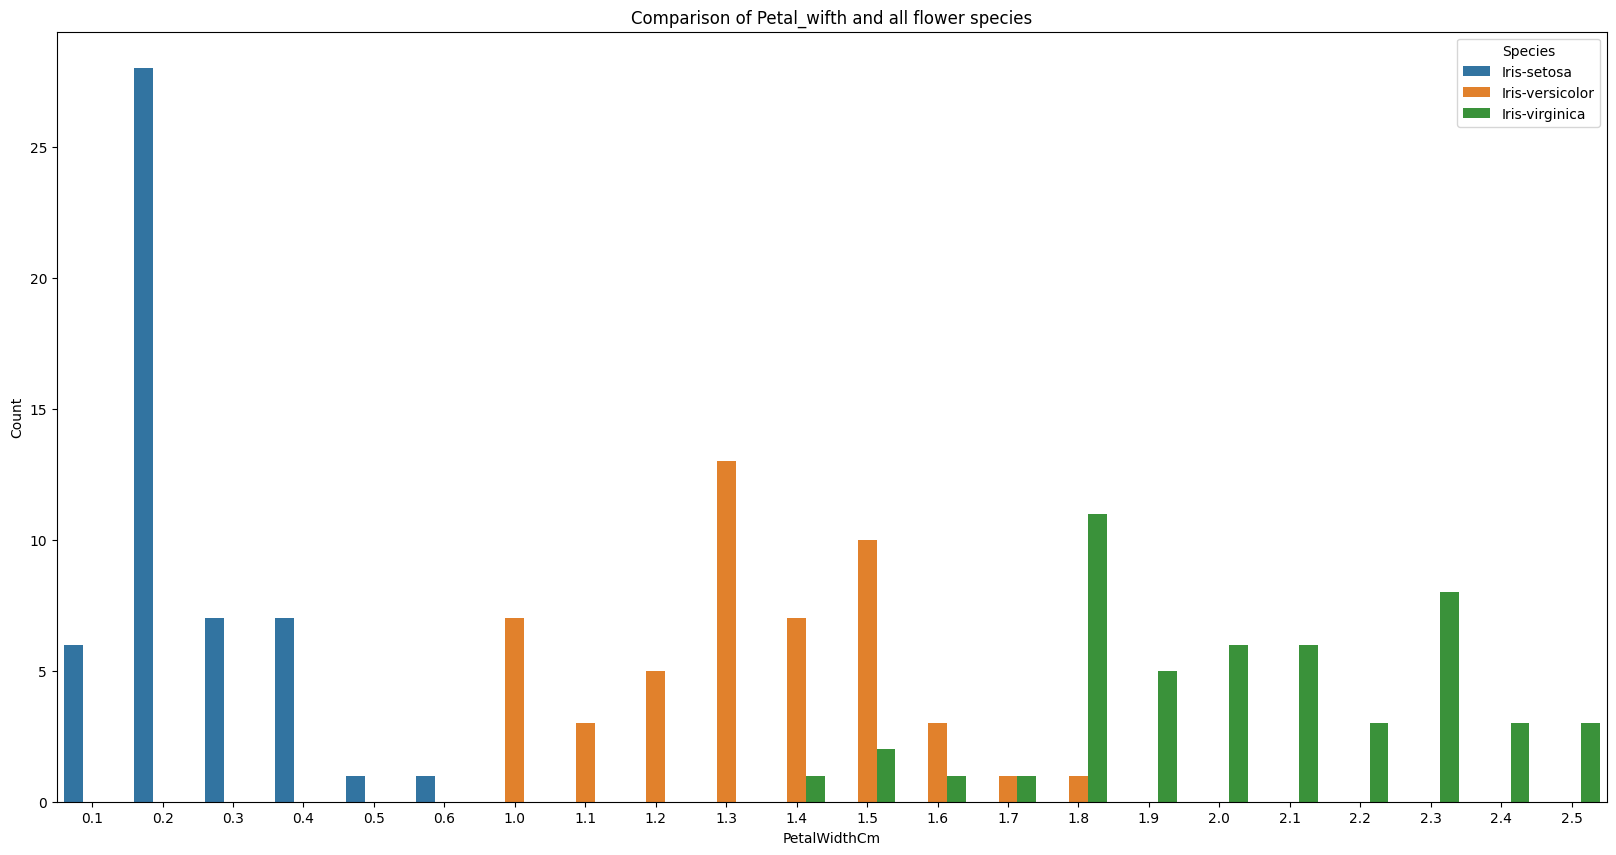

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(x='PetalWidthCm', hue='Species', data=Iris_data)

# Add titles and labels
plt.title('Comparison of Petal_wifth and all flower species')
plt.xlabel('PetalWidthCm')
plt.ylabel('Count')
plt.legend(title='Species', loc='upper right')
# Show the plot
plt.show()

## Model Training.
Using train_test_split we split the whole data into training and testing datasets.
Later we’ll use the testing dataset to check the accuracy of the model

In [15]:
# we have to convert species categorical variable into numerical/quantative variables
flower_types={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Iris_data["Species"]=Iris_data["Species"].map(flower_types)

In [16]:
Iris_data.head() # so as you seen in result that Species has change in numercical type

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#Preparing X and Y

In [17]:
Iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [40]:
# Preparing the training set
X=Iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y=Iris_data[["Species"]].values

#Now we have to show the relationship between feature with each species

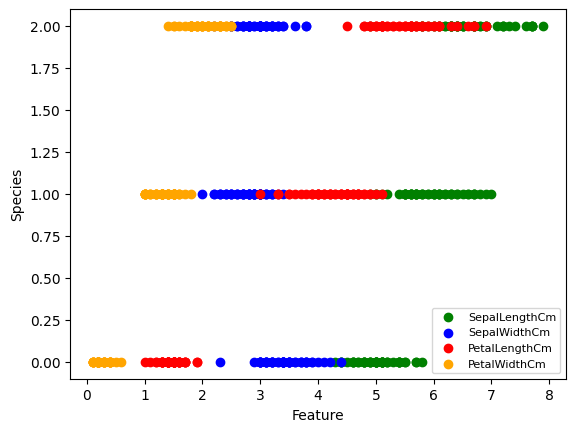

In [53]:
plt.xlabel('Feature')
plt.ylabel('Species')

pltX=Iris_data.loc[:,'SepalLengthCm']
pltY=Iris_data.loc[:,'Species']
plt.scatter(pltX,pltY,color='green',label='SepalLengthCm')

pltX=Iris_data.loc[:,'SepalWidthCm']
pltY=Iris_data.loc[:,'Species']
plt.scatter(pltX,pltY,color='blue',label='SepalWidthCm')

pltX=Iris_data.loc[:,'PetalLengthCm']
pltY=Iris_data.loc[:,'Species']
plt.scatter(pltX,pltY,color='red',label='PetalLengthCm')

pltX=Iris_data.loc[:,'PetalWidthCm']
pltY=Iris_data.loc[:,'Species']
plt.scatter(pltX,pltY,color='orange',label='PetalWidthCm')

plt.legend(loc=4,prop={'size':8})
plt.show()

In [51]:
# we do here training the data set in 80% training and 20% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state=40)

In [54]:
#train the model
model=LogisticRegression()
model.fit(X_train,y_train) # training the model

LogisticRegression()

In [57]:
# now we have to do prediction test with X test 
predictions=model.predict(X_test)
print(predictions)

print(y_test)

[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]
[[0]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]]


In [59]:
#now classify this in term of precion,recall,f1 score
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



So we can say that our model is 100% accurate 


In [63]:
print(accuracy_score(y_test,predictions))
print("n\----------------------------------------")
print(confusion_matrix(y_test,predictions))

1.0
n\----------------------------------------
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
